In [ ]:
# MODEL WITH SENTIMENT ANALYSIS


In [4]:
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=a84d25ddd024c855103a4586982f3ffc725877e327ccb192b2fa1efdecffc213
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [26]:
data.shape

(921, 7)

In [38]:
print(data.head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2016-01-04  25.652500  26.342501  25.500000  26.337500  23.977480  270597600   
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.376616  223164000   
2016-01-06  25.139999  25.592501  24.967501  25.174999  22.919140  273829600   
2016-01-07  24.670000  25.032499  24.107500  24.112499  21.951851  324377600   
2016-01-08  24.637501  24.777500  24.190001  24.240000  22.067924  283192000   

            ts_polarity  
Date                     
2016-01-04     0.070389  
2016-01-05     0.133635  
2016-01-06     0.072042  
2016-01-07     0.074369  
2016-01-08     0.051595  


In [ ]:
from ta import add_all_ta_features
from ta.utils import dropna
from sklearn.preprocessing import StandardScaler

In [ ]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
# Set the 'Date' column as the index
data = data.set_index('Date')


In [27]:
print(data.dtypes)

Open           float64
High           float64
Low            float64
Close          float64
Adj Close      float64
Volume           int64
ts_polarity    float64
dtype: object


In [ ]:
data = dropna(data)

In [ ]:
# NA values dropped, technical indicators added uptill here.

In [25]:
data=data1

In [28]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Split the data into features and target
X = data_scaled.drop('Adj Close', axis=1)
y = data_scaled['Adj Close']


In [ ]:
print(data_scaled.head())

       Open      High       Low     Close  Adj Close    Volume  ts_polarity  \
0 -1.375674 -1.325190 -1.372582 -1.306705  -1.335445  2.392343    -0.599013   
1 -1.293165 -1.312792 -1.362023 -1.375679  -1.397926  1.586860     0.744474   
2 -1.428938 -1.402679 -1.428546 -1.428977  -1.446067  2.447226    -0.563899   
3 -1.478026 -1.460538 -1.519355 -1.539755  -1.546446  3.305596    -0.514468   
4 -1.481159 -1.486367 -1.510908 -1.526169  -1.534155  2.606212    -0.998239   

   twitter_volume  volume_adi  volume_obv  ...  momentum_ppo  \
0       -0.008810    2.213196   -1.836416  ...     -0.277493   
1        0.394614    2.207310   -1.950856  ...     -0.383870   
2        1.099589    2.198566   -2.091277  ...     -0.548816   
3        1.561421    2.190605   -2.257620  ...     -0.849509   
4        1.488071    2.180781   -2.112397  ...     -1.060212   

   momentum_ppo_signal  momentum_ppo_hist  momentum_pvo  momentum_pvo_signal  \
0            -0.291957          -0.005307      0.153329     

In [29]:
# Split data into training and testing sets
split_point = int(len(data) * 0.8)
X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]
X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]


In [ ]:
import numpy as np

In [30]:
# Reshape data for LSTM
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

In [32]:
#LSTM model with ts_polarity column included
model = Sequential()
model.add(LSTM(60, activation='relu', input_shape=(1, X_train_reshaped.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=28, validation_split=0.1)


Epoch 1/100
24/24 [==============================] - 3s 24ms/step - loss: 0.7475 - val_loss: 2.0309
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.3782 - val_loss: 1.3442
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0993 - val_loss: 0.3683
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0428 - val_loss: 0.0556
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0283 - val_loss: 0.0430
Epoch 6/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0247 - val_loss: 0.0346
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0232 - val_loss: 0.0274
Epoch 8/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0270 - val_loss: 0.0111
Epoch 9/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0218 - val_loss: 0.0199
Epoch 10/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.0168
Epoch 11

In [33]:
# Making predictions with the LSTM model
y_pred_test = model.predict(X_test_reshaped)


6/6 [==============================] - 0s 4ms/step


In [34]:
# Get the index of 'Adj Close' column in the scaled DataFrame
adj_close_index = data_scaled.columns.get_loc('Adj Close')

# Print the index
print(f"The index of 'Adj Close' is: {adj_close_index}")


The index of 'Adj Close' is: 4


In [35]:
# Index for 'Adj Close'
adj_close_index = 4

# Creating a dummy array for inverse transformation of predictions
dummy_array_pred = np.zeros((y_pred_test.shape[0], data_scaled.shape[1]))
dummy_array_pred[:, adj_close_index] = y_pred_test.flatten()

# Inverse transforming the predictions
y_pred_test_original = scaler.inverse_transform(dummy_array_pred)[:, adj_close_index]

# Creating a dummy array for inverse transformation of y_test
dummy_array_y_test = np.zeros((y_test.shape[0], data_scaled.shape[1]))
dummy_array_y_test[:, adj_close_index] = y_test.values

# Inverse transforming y_test
y_test_original = scaler.inverse_transform(dummy_array_y_test)[:, adj_close_index]


In [36]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test_original, y_pred_test_original)
print(f"R-squared on Test Set: {r_squared}")



R-squared on Test Set: 0.977870981664357


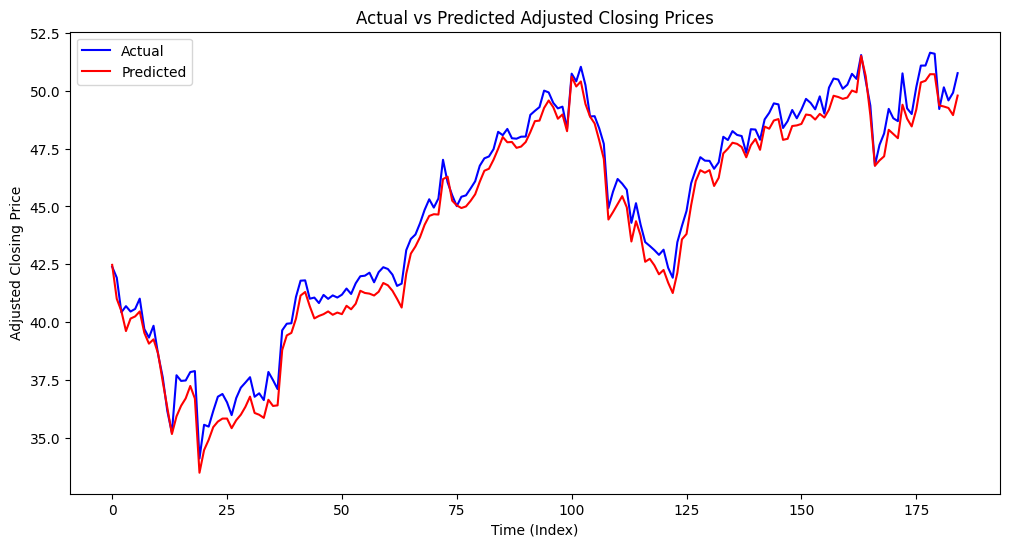

In [37]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(y_pred_test_original, label='Predicted', color='red')
plt.title('Actual vs Predicted Adjusted Closing Prices')
plt.xlabel('Time (Index)')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()


In [5]:
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna

!pip install yfinance
import yfinance as yf

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [6]:
# MODEL WITHOUT SENTIMENT ANALYSIS

# Load the dataset
data1 = pd.read_csv('/content/AAPL.csv')

# Convert the 'Date' column to datetime and set it as the index
data1['Date'] = pd.to_datetime(data1['Date'])
data1 = data1.set_index('Date')
data1=dropna(data1)
data1.shape





In [ ]:
print(data1.head())

             Open   High    Low  Close  Adj Close     Volume  ts_polarity  \
Date                                                                        
2016-01-04  25.65  26.34  25.50  26.34      24.44  270597600     0.070389   
2016-01-05  26.44  26.46  25.60  25.68      23.83  223164000     0.133635   
2016-01-06  25.14  25.59  24.97  25.17      23.36  273829600     0.072042   
2016-01-07  24.67  25.03  24.11  24.11      22.38  324377600     0.074369   
2016-01-08  24.64  24.78  24.19  24.24      22.50  283192000     0.051595   

            twitter_volume    volume_adi  volume_obv  ...  momentum_ppo  \
Date                                                  ...                 
2016-01-04          1133.0 -9.535344e+08   270597600  ...      0.000000   
2016-01-05          1430.0 -2.095304e+09    47433600  ...     -0.199473   
2016-01-06          1949.0 -3.791281e+09  -226396000  ...     -0.508772   
2016-01-07          2289.0 -5.335600e+09  -550773600  ...     -1.072617   
2016-01-08

In [ ]:
print(data1.tail())

             Open   High    Low  Close  Adj Close     Volume  ts_polarity  \
Date                                                                        
2019-08-26  51.47  51.80  51.26  51.62      51.12  104174400     0.072340   
2019-08-27  51.97  52.14  50.88  51.04      50.54  103493200     0.117541   
2019-08-28  51.03  51.43  50.83  51.38      50.88   63755200     0.061477   
2019-08-29  52.13  52.33  51.67  52.25      51.74   83962000     0.056460   
2019-08-30  52.54  52.61  51.80  52.19      51.67   84573600     0.106096   

            twitter_volume    volume_adi  volume_obv  ...  momentum_ppo  \
Date                                                  ...                 
2019-08-26           888.0 -6.559213e+11  5568399200  ...      0.792660   
2019-08-27           962.0 -6.560806e+11  5464906000  ...      0.638370   
2019-08-28           895.0 -6.561338e+11  5528661200  ...      0.563365   
2019-08-29          1083.0 -6.561999e+11  5612623200  ...      0.632567   
2019-08-30

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd

In [7]:
data2 = yf.download('AAPL', start='2016-01-04', end='2019-08-30')

[*********************100%%**********************]  1 of 1 completed


In [8]:
print(data2.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04  25.652500  26.342501  25.500000  26.337500  23.977480  270597600
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.376616  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  22.919140  273829600
2016-01-07  24.670000  25.032499  24.107500  24.112499  21.951851  324377600
2016-01-08  24.637501  24.777500  24.190001  24.240000  22.067924  283192000


In [9]:
data2['ts_polarity']=data1['ts_polarity']

In [19]:
print(data2.tail())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-08-23  52.357498  53.012501  50.250000  50.660000  49.206863  187272000   
2019-08-26  51.465000  51.797501  51.264999  51.622501  50.141754  104174400   
2019-08-27  51.965000  52.137501  50.882500  51.040001  49.575958  103493200   
2019-08-28  51.025002  51.430000  50.830002  51.382500  49.908634   63755200   
2019-08-29  52.125000  52.330002  51.665001  52.252499  50.753681   83962000   

            ts_polarity  
Date                     
2019-08-23     0.097330  
2019-08-26     0.072340  
2019-08-27     0.117541  
2019-08-28     0.061477  
2019-08-29     0.056460  


In [20]:
data1=data2

In [21]:
data1.shape

(921, 7)

In [22]:
print(data1.tail())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-08-23  52.357498  53.012501  50.250000  50.660000  49.206863  187272000   
2019-08-26  51.465000  51.797501  51.264999  51.622501  50.141754  104174400   
2019-08-27  51.965000  52.137501  50.882500  51.040001  49.575958  103493200   
2019-08-28  51.025002  51.430000  50.830002  51.382500  49.908634   63755200   
2019-08-29  52.125000  52.330002  51.665001  52.252499  50.753681   83962000   

            ts_polarity  
Date                     
2019-08-23     0.097330  
2019-08-26     0.072340  
2019-08-27     0.117541  
2019-08-28     0.061477  
2019-08-29     0.056460  


In [23]:
data1=dropna(data1)

In [24]:
data1.shape

(921, 7)

In [16]:



from sklearn.preprocessing import StandardScaler

# Drop the 'ts_polarity' column
data1 = data1.drop('ts_polarity', axis=1)

# Scale the features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)

# Split the data into features and target
X = data_scaled.drop('Adj Close', axis=1)
y = data_scaled['Adj Close']




In [17]:
#Get the index of 'Adj Close' column in the scaled DataFrame
adj_close_index = data_scaled.columns.get_loc('Adj Close')

# Print the index
print(f"The index of 'Adj Close' is: {adj_close_index}")

The index of 'Adj Close' is: 4


Epoch 1/100
24/24 [==============================] - 9s 26ms/step - loss: 0.7656 - val_loss: 2.1305
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4204 - val_loss: 1.6805
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 0.1264 - val_loss: 0.7946
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0476 - val_loss: 0.0724
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0268 - val_loss: 0.0300
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0273 - val_loss: 0.0630
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.0901
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0234 - val_loss: 0.0880
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0223 - val_loss: 0.0603
Epoch 10/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0222 - val_loss: 0.0149
Epoch 11

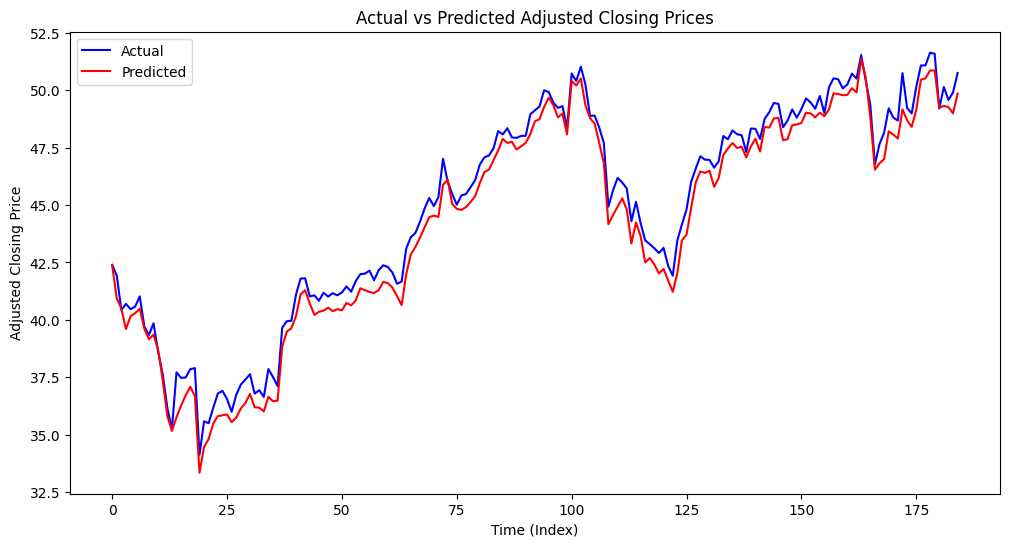

In [18]:


# Split data into training and testing sets
split_point = int(len(data1) * 0.8)
X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]
X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]

# Reshape data for LSTM
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(60, activation='relu', input_shape=(1, X_train_reshaped.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=28, validation_split=0.1)

# Making predictions with the LSTM model
y_pred_test = model.predict(X_test_reshaped)

# Inverse transforming the predictions and y_test (assuming 'Adj Close' is at index 4)
adj_close_index = 4
dummy_array_pred = np.zeros((y_pred_test.shape[0], data_scaled.shape[1]))
dummy_array_pred[:, adj_close_index] = y_pred_test.flatten()
y_pred_test_original = scaler.inverse_transform(dummy_array_pred)[:, adj_close_index]

dummy_array_y_test = np.zeros((y_test.shape[0], data_scaled.shape[1]))
dummy_array_y_test[:, adj_close_index] = y_test.values
y_test_original = scaler.inverse_transform(dummy_array_y_test)[:, adj_close_index]

# Calculate R-squared
r_squared = r2_score(y_test_original, y_pred_test_original)
print(f"R-squared on Test Set: {r_squared}")

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(y_pred_test_original, label='Predicted', color='red')
plt.title('Actual vs Predicted Adjusted Closing Prices')
plt.xlabel('Time (Index)')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()
